/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/Forecasts/.venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


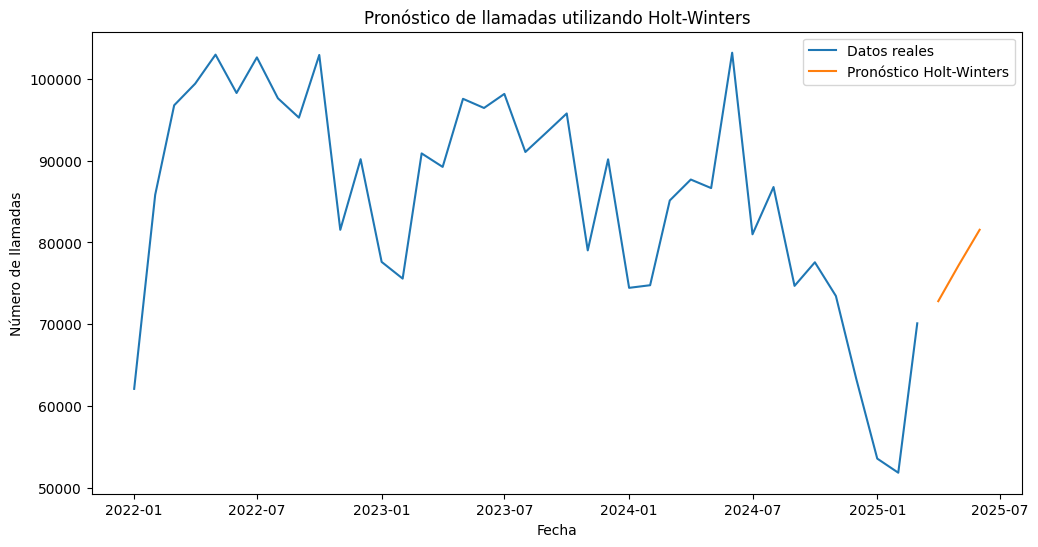

2025-04-01    72818.941182
2025-05-01    77203.914667
2025-06-01    81547.253808
Freq: MS, dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Cargar el dataset
df = pd.read_csv('../history/HISTORY.csv')
df['Fechas'] = pd.to_datetime(df['Fechas'], format='%m/%d/%Y')
df.set_index('Fechas', inplace=True)

# Ajustar el modelo Holt-Winters
model = ExponentialSmoothing(df['Llamadas'], seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Realizar la predicción (3 meses)
forecast = model_fit.forecast(steps=3)

# Graficar los resultados
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Llamadas'], label='Datos reales')
plt.plot(forecast.index, forecast, label='Pronóstico Holt-Winters')
plt.xlabel('Fecha')
plt.ylabel('Número de llamadas')
plt.title('Pronóstico de llamadas utilizando Holt-Winters')
plt.legend()
plt.show()

# Mostrar el pronóstico
print(forecast)